importing the dependencies

In [30]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [31]:
#load and prepare the fashion mnist dataset #
fashion_mnist=datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

Data prcoessing

In [32]:
type(train_images)

numpy.ndarray

In [33]:
type(train_labels)

numpy.ndarray

In [34]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [49]:
print(train_images[0].shape)

(28, 28, 1)


In [36]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

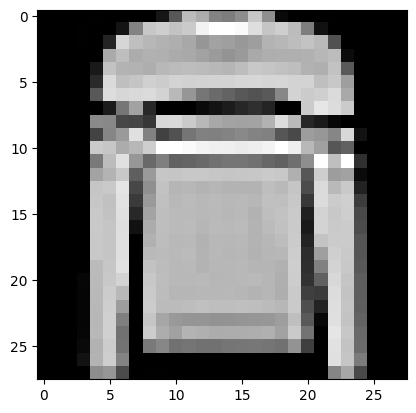

In [37]:
#display an image from the dataset#
plt.imshow(train_images[5],cmap="gray")
plt.show()

In [38]:
#Normalize pixel value to be between 0 and 1 # # لازم pixel قيمة تكون بين 1و0 بيحسن acc#
train_images=train_images/255.0
test_images=test_images/255.0


In [39]:
print(train_images[0])



[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [43]:
#Reshape image to specify that it a single channel (grayscale)
train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(test_images.shape[0],28,28,1)

هذا الكود يُعدّ البيانات ليتم استخدامها في نموذج تعلم عميق، ويتأكد من أن جميع الصور هي صور بتدرج رمادي عن طريق تحديد قناة واحدة فقط لكل صورة.

`طيب ليه gray scale ؟`
 تحويل الصور إلى تدرج رمادي يعتمد على طبيعة المهمة والنموذج المستخدم، وعادةً يكون مناسبًا في الحالات التي لا تكون فيها الألوان ضرورية للتمييز بين الأنماط.


`طيب لو الالوان ضروريه؟`
في هذه الحالة، يتم إدخال الصور إلى النموذج بشكل ثلاثي الأبعاد (ارتفاع × عرض × 3 قنوات). كل قناة تمثل لونًا محددًا (الأحمر، الأخضر، الأزرق)

In [48]:
print(train_labels[0])
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']#

9


In [44]:

# Build the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) # output layers

`1. فهم مهمة التصنيف:`
الرقم 10 يمثل عدد الفئات (classes) التي يحاول النموذج تصنيفها.
على سبيل المثال، إذا كنت تتعامل مع مجموعة بيانات مثل MNIST، التي تحتوي على صور لأرقام مكتوبة بخط اليد، فهناك 10 أرقام محتملة (0-9). إذًا، عدد الفئات هو 10.

In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

`ليه عملنها true `
1. ما هو الـ Logits؟
Logits هو مصطلح يشير إلى مخرجات النموذج قبل تطبيق دالة التنشيط النهائية (عادةً softmax أو sigmoid). هذه المخرجات تكون قيم غير محددة (قد تكون موجبة أو سالبة) ولا تمثل احتمالات.
2. ما هو SparseCategoricalCrossentropy؟
SparseCategoricalCrossentropy هو دالة فقد (loss function) تُستخدم في تصنيف متعدد الفئات. هذه الدالة تتوقع أن تكون مخرجات النموذج في شكل احتمالات للفئات المختلفة.
3. لماذا from_logits=True؟
عند ضبط from_logits=True، فإنك تخبر دالة الفقد بأن مخرجات النموذج هي "logits" (أي لم يتم تمريرها عبر دالة softmax بعد).
إذا لم يكن from_logits=True وكان النموذج يعطي مخرجات logits، فإن دالة الفقد ستقوم تلقائيًا بتطبيق دالة softmax على هذه المخرجات.
إذا كانت مخرجات النموذج بالفعل تم تمريرها عبر softmax، فإنك ستترك from_logits=False (وهو الإعداد الافتراضي).
لماذا تحتاج إلى ضبطها على True؟
في الشبكات العصبية العميقة، من الشائع أن يكون الـ output layer من النموذج بدون تفعيل (activation function) عند استخدام دالة الفقد SparseCategoricalCrossentropy مع from_logits=True. بعد ذلك، يتم تطبيق softmax داخل دالة الفقد نفسها.
السبب هو أن softmax و cross-entropy يمكن دمجهم معًا في خطوة واحدة لتحسين الاستقرار العددي أثناء التدريب. هذا يجعل العملية أكثر كفاءة وأقل عرضة للمشاكل الناتجة عن الأرقام الصغيرة جدًا أو الكبيرة جدًا.


In [47]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.7471 - loss: 0.6930 - val_accuracy: 0.8729 - val_loss: 0.3520
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.8825 - loss: 0.3193 - val_accuracy: 0.8849 - val_loss: 0.3181
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9002 - loss: 0.2681 - val_accuracy: 0.8939 - val_loss: 0.2876
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9116 - loss: 0.2338 - val_accuracy: 0.9022 - val_loss: 0.2640
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 33ms/step - accuracy: 0.9217 - loss: 0.2098 - val_accuracy: 0.8999 - val_loss: 0.2644


Model Evaluation

In [51]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('accuracy:', test_acc)


313/313 - 4s - 13ms/step - accuracy: 0.8999 - loss: 0.2644
accuracy: 0.8999000191688538


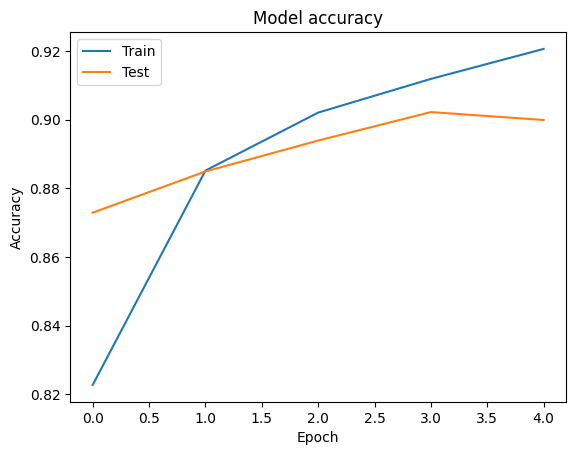

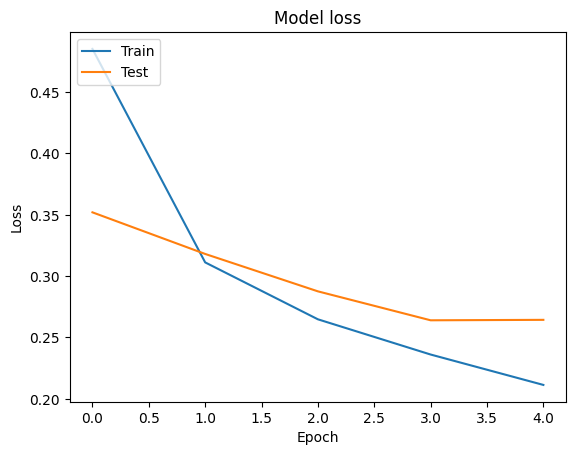

In [52]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [59]:
model.save('trained_fashion_mnist_model.h5')